In [4]:
import math
import collections

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

%matplotlib inline

In [5]:
pd.options.display.max_rows = 10

In [6]:
allyears24 = pd.read_csv('data/allyears.csv.gz')

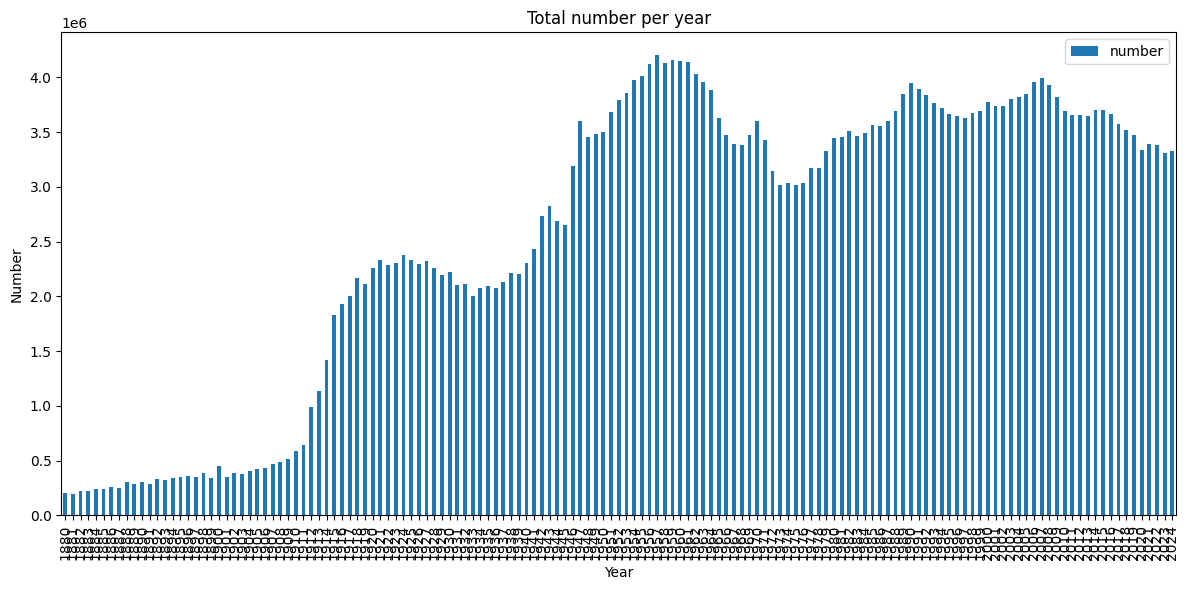

In [ ]:
# allyears['year'] = pd.to_datetime(allyears['year'], format='%Y')
# allyears24 
xTotalCount = allyears24['number'].sum()
xTotalCount

pd.DataFrame(allyears24.groupby('year')['number'].sum()).plot(kind='bar', figsize=(12, 6), title='Total number per year')
pp.xlabel('Year')
pp.ylabel('Number')
pp.xticks(rotation=90)
pp.tight_layout()


In [17]:
# count the total numbers grouped by gender
mTotalCount = allyears24.groupby(['gender'])['number'].sum().reset_index()
# mTotalCount['number'].apply(lambda x: x / xTotalCount, axis=1)
mTotalCount['percent'] = (mTotalCount['number'] / xTotalCount) * 100

format = lambda x: '{:.0f}%'.format(x)
format2 = lambda x2: "{:,}".format(x2)
mTotalCount['percent'] = mTotalCount['percent'].apply(format)
mTotalCount['number'] = mTotalCount['number'].apply(format2)

mTotalCount

,gender,number,percent
0,F,"183,933,179",49%
1,M,"188,075,971",51%


In [21]:
xTotalCountByYear = allyears24.groupby(['year'])['number'].sum().reset_index()
xTotalCountByYear['number'] = xTotalCountByYear['number'].apply(lambda x: "{:,}".format(x))
xTotalCountByYear

,year,number
0,1880,"201,484"
1,1881,"192,688"
2,1882,"221,533"
3,1883,"216,946"
4,1884,"243,461"
...,...,...
140,2020,"3,340,577"
141,2021,"3,387,949"
142,2022,"3,383,135"
143,2023,"3,311,196"


In [34]:
allyears24_byyear = allyears24.set_index(['gender','year']).sort_index()

In [35]:
allyears24_byyear.loc['M',2024].sort_values('number', ascending=False)

name  number
gender year                  
M      2024      Liam   22164
       2024      Noah   20337
       2024    Oliver   15343
       2024  Theodore   12011
       2024     James   11793
...               ...     ...
       2024   Herrick       5
       2024  Hernando       5
       2024  Herminio       5
       2024  Herberth       5
       2024    Zyrell       5

[14243 rows x 2 columns]

In [36]:
allyears24_byyear.loc['M',2024].sort_values('number', ascending=False)

name  number
gender year                  
M      2024      Liam   22164
       2024      Noah   20337
       2024    Oliver   15343
       2024  Theodore   12011
       2024     James   11793
...               ...     ...
       2024   Herrick       5
       2024  Hernando       5
       2024  Herminio       5
       2024  Herberth       5
       2024    Zyrell       5

[14243 rows x 2 columns]

In [37]:
allyears24_byyear.loc['M',2024].sort_values('number', ascending=False).head(10)

name  number
gender year                  
M      2024      Liam   22164
       2024      Noah   20337
       2024    Oliver   15343
       2024  Theodore   12011
       2024     James   11793
       2024     Henry   11547
       2024     Mateo   11302
       2024    Elijah   11171
       2024     Lucas   10703
       2024   William   10596

In [38]:
allyears24_byyear.loc['F',2024].sort_values('number', ascending=False).head(10)

name  number
gender year                   
F      2024     Olivia   14718
       2024       Emma   13485
       2024     Amelia   12740
       2024  Charlotte   12552
       2024        Mia   12113
       2024     Sophia   12088
       2024   Isabella   10770
       2024     Evelyn    9116
       2024        Ava    8662
       2024      Sofia    8094

In [39]:
allyears24_byyear.loc['F',2024].sort_values('number', ascending=False).head(10).reset_index().name

0       Olivia
1         Emma
2       Amelia
3    Charlotte
4          Mia
5       Sophia
6     Isabella
7       Evelyn
8          Ava
9        Sofia
Name: name, dtype: object

In [40]:
# get the top ten names for sex and year

def getyear(gender, year):
    return (allyears24_byyear.loc[gender, year]             # select M/F, year
               .sort_values('number', ascending=False) # sort by most common
               .head(10)                               # only ten
               .reset_index()                          # lose the index
               .name)                                  # return a name-only Series

In [41]:
# create DataFrame with columns given by top ten name Series for range of years
pd.DataFrame({year: getyear('M',year) for year in range(2010,2025)})

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Jacob,Jacob,Jacob,Noah,Noah,Noah,Noah,Liam,Liam,Liam,Liam,Liam,Liam,Liam,Liam
1,Ethan,Mason,Mason,Jacob,Liam,Liam,Liam,Noah,Noah,Noah,Noah,Noah,Noah,Noah,Noah
2,Michael,William,Ethan,Liam,Mason,Mason,William,William,William,Oliver,Oliver,Oliver,Oliver,Oliver,Oliver
3,Jayden,Jayden,Noah,Mason,Jacob,Jacob,Mason,James,James,William,Elijah,Elijah,James,James,Theodore
4,William,Noah,William,William,William,William,James,Logan,Oliver,Elijah,William,James,Elijah,Elijah,James
5,Alexander,Michael,Liam,Ethan,Ethan,Ethan,Benjamin,Benjamin,Benjamin,James,James,William,William,Mateo,Henry
6,Noah,Ethan,Michael,Michael,Michael,James,Jacob,Mason,Elijah,Benjamin,Benjamin,Benjamin,Henry,Theodore,Mateo
7,Daniel,Alexander,Jayden,Alexander,Alexander,Alexander,Michael,Elijah,Lucas,Lucas,Lucas,Lucas,Lucas,Henry,Elijah
8,Aiden,Aiden,Alexander,Jayden,James,Michael,Elijah,Jacob,Mason,Mason,Henry,Henry,Benjamin,Lucas,Lucas
9,Anthony,Daniel,Aiden,Daniel,Daniel,Benjamin,Ethan,Oliver,Logan,Alexander,Alexander,Theodore,Theodore,William,William


In [42]:
pd.DataFrame({year: getyear('F',year) for year in range(2010,2024)})

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Isabella,Sophia,Sophia,Sophia,Emma,Emma,Emma,Emma,Emma,Olivia,Olivia,Olivia,Olivia,Olivia
1,Sophia,Isabella,Emma,Emma,Olivia,Olivia,Olivia,Olivia,Olivia,Emma,Emma,Emma,Emma,Emma
2,Emma,Emma,Isabella,Olivia,Sophia,Sophia,Ava,Ava,Ava,Ava,Ava,Charlotte,Charlotte,Charlotte
3,Olivia,Olivia,Olivia,Isabella,Isabella,Ava,Sophia,Isabella,Isabella,Sophia,Charlotte,Amelia,Amelia,Amelia
4,Ava,Ava,Ava,Ava,Ava,Isabella,Isabella,Sophia,Sophia,Isabella,Sophia,Ava,Sophia,Sophia
5,Emily,Emily,Emily,Mia,Mia,Mia,Mia,Mia,Charlotte,Charlotte,Amelia,Sophia,Isabella,Mia
6,Abigail,Abigail,Abigail,Emily,Emily,Abigail,Charlotte,Charlotte,Mia,Amelia,Isabella,Isabella,Ava,Isabella
7,Madison,Madison,Mia,Abigail,Abigail,Emily,Abigail,Amelia,Amelia,Mia,Mia,Mia,Mia,Ava
8,Chloe,Mia,Madison,Madison,Madison,Charlotte,Emily,Evelyn,Harper,Harper,Evelyn,Evelyn,Evelyn,Evelyn
9,Mia,Chloe,Elizabeth,Elizabeth,Charlotte,Harper,Amelia,Abigail,Evelyn,Evelyn,Harper,Harper,Luna,Luna


In [43]:
def plotname(gender, name):
    data = allyears24.query('gender == @gender and name == @name')
    
    pp.plot(data.year, data.number, label=name)
    pp.axis(xmin=1880, xmax=2024)

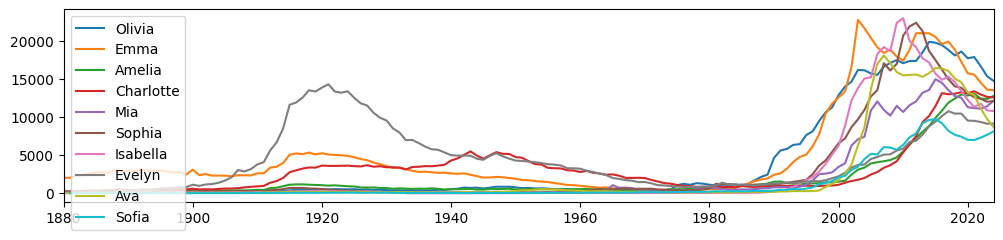

In [44]:
pp.figure(figsize=(12,2.5))

for name in getyear('F',2024):
    plotname('F', name)

pp.legend()

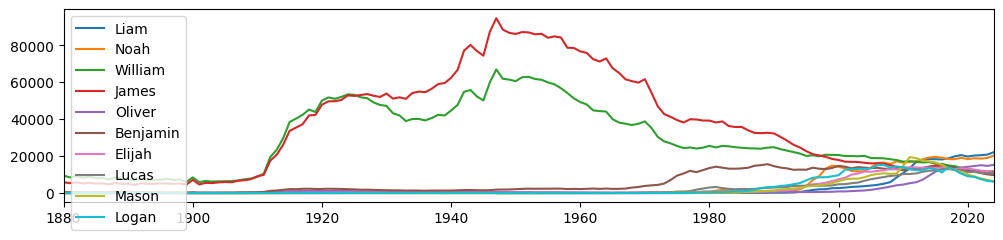

In [45]:
pp.figure(figsize=(12,2.5))

for name in getyear('M',2018):
    plotname('M', name)

pp.legend()

In [51]:
list(getyear('M',2024))

['Liam',
 'Noah',
 'Oliver',
 'Theodore',
 'James',
 'Henry',
 'Mateo',
 'Elijah',
 'Lucas',
 'William']

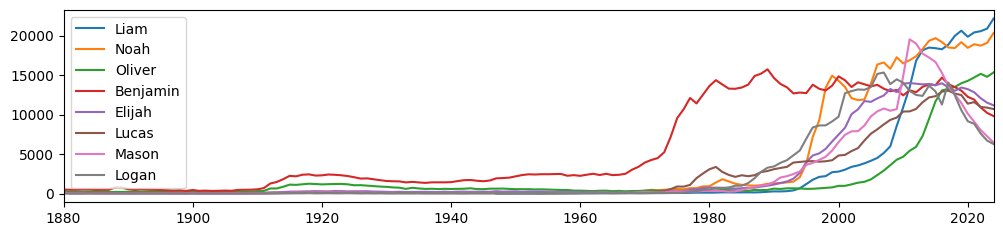

In [47]:
pp.figure(figsize=(12,2.5))

for name in ['Liam','Noah','Oliver','Benjamin','Elijah','Lucas','Mason','Logan']:
    plotname('M', name)

pp.legend()

In [48]:
# get all time favorites: select F, group by name, sum over years, sort, cap 
alltime24_f = allyears24_byyear.loc['F'].groupby('name').sum().sort_values('number', ascending=False).head(10)

In [49]:
alltime24_f

,number
name,
Mary,4139160
Elizabeth,1681878
Patricia,1573445
Jennifer,1471191
Linda,1454832
Barbara,1436402
Margaret,1262307
Susan,1123232
Dorothy,1111479


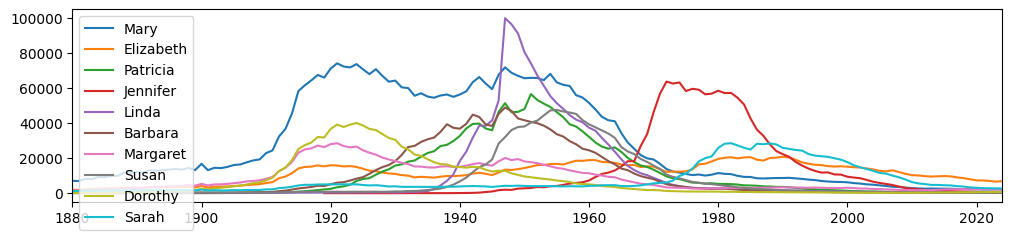

In [ ]:
pp.figure(figsize=(12,2.5))

for name in alltime24_f.index:
    plotname('F', name)

pp.legend()

In [57]:
# get all time favorites: select M, group by name, sum over years, sort, cap 
alltime24_m = allyears24_byyear.loc['M'].groupby('name').sum().sort_values('number', ascending=False).head(10)

In [58]:
alltime24_m

,number
name,
James,5238570
John,5174470
Robert,4845891
Michael,4418526
William,4189004
David,3669730
Joseph,2662040
Richard,2576005
Charles,2428685


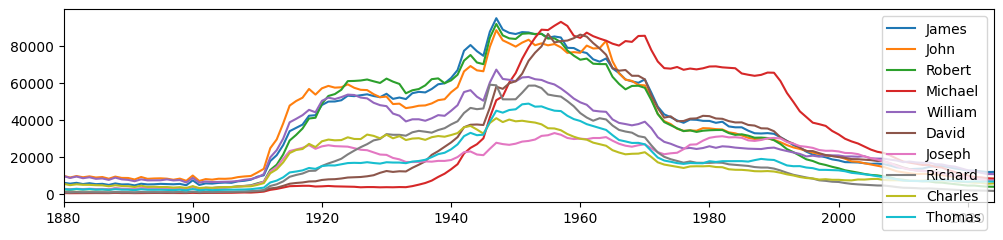

In [59]:
pp.figure(figsize=(12,2.5))

for name in alltime24_m.index:
    plotname('M', name)

pp.legend()